In [2]:
# Ejemplo de clasificación de imagenes con TF
# Se introduce el dataset fashion-mnist como dataset de trabajo.
# Se introducen las redes densas (Dense, Full Connected)

In [6]:
import tensorflow as tf
import keras
import os
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt

load_dotenv()

print(f'tensorflow version: {tf.__version__}')
print(f'numpy version: {np.__version__}')
print(f'keras version: {keras.__version__}')

tensorflow version: 2.17.0
numpy version: 1.26.4
keras version: 3.6.0


In [7]:
# --------------------------------
# Load
# --------------------------------

fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

In [12]:
# 60k imagenes de 28x28 pixeles
x_train.shape

(60000, 28, 28)

Index: 79
Label: 9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.00392157 0.00392157
  0.00784314 0.         0.         0.         0.         0.13333333
  0.10980392 0.         0.01568627 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.0078431

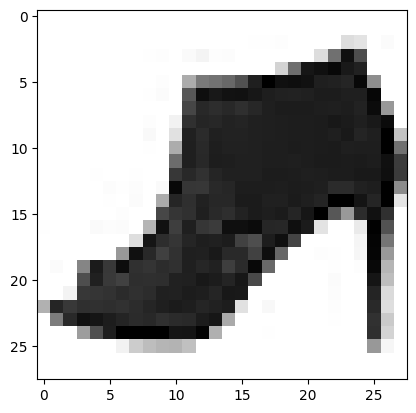

In [18]:
# --------------------------------
# Show
# --------------------------------
INDEX = np.random.randint(100)

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot
print(f'Index: {INDEX}')
print(f'Label: {y_train[INDEX]}')
print(x_train[INDEX])
plt.imshow(x_train[INDEX], cmap='binary')
plt.show()

In [10]:
# --------------------------------
# Preprocessing
# --------------------------------

# divide by 255 to normalize
x_train, x_test = x_train/255, x_test/255

In [19]:
# --------------------------------
# Define Model
# --------------------------------

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile
model.compile(optimizer=tf._optimizers.Adam(),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# sparse_categorical_crossentropy:
# 1. labels are integers (not one-hot encoded)
# 2. Typical for multiclass classification
# 3. Based on cross-entropy. 
# 4. Como softmax genera probabilidades, cross-entropy calcula, para la probabilidad predicha de la true-label segun trainning-labels
#    loss = -log(y_c). Con esto, si la prob. fuera 1, loss = 0. Penaliza bajas probabilidades para la clase verdadera. 

/home/gonzalo/.virtualenvs/genv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# --------------------------------
# Train
# --------------------------------
print(f'\nMODEL TRAINING:')
model.fit(x_train, y_train, epochs=10)


MODEL TRAINING:
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7841 - loss: 0.6264
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8627 - loss: 0.3803
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8735 - loss: 0.3390
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8840 - loss: 0.3128
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8898 - loss: 0.2969
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8965 - loss: 0.2834
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8986 - loss: 0.2675
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9057 - loss: 0.2559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9082 - loss: 0.2432
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9101 - loss: 0.2395

MODEL EVALUATION:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8726 - loss: 0.3625


In [30]:
# --------------------------------
# EVALUATION
# --------------------------------
print(f'\nMODEL EVALUATION:')
eval_results = model.evaluate(x_test, y_test, return_dict=True)
print(f'LOSS: {eval_results["loss"]}')
print(f'ACCURACY: {eval_results["accuracy"]}')


MODEL EVALUATION:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8725 - loss: 0.3624
LOSS: 0.35786956548690796
ACCURACY: 0.8723000288009644
